In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/shuva/OneDrive/Desktop/dataframes/cluster12956.csv', sep=';', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1963 non-null   float64
 1   x2      1963 non-null   float64
 2   x3      1963 non-null   float64
 3   x4      1963 non-null   float64
dtypes: float64(4)
memory usage: 61.5 KB


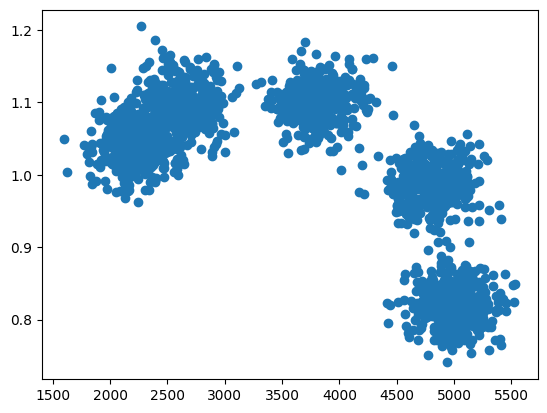

In [3]:
plt.scatter(x=df['x1'], y=df['x2'])
plt.show()

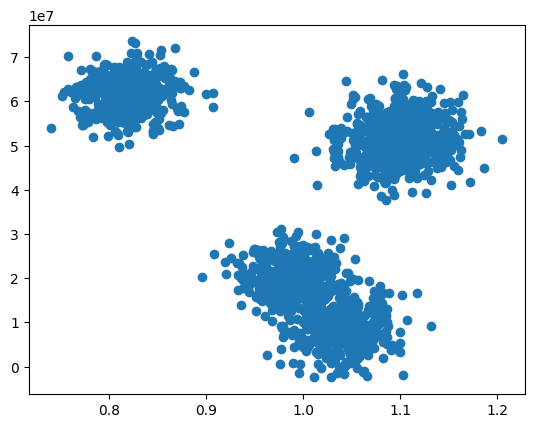

In [4]:
plt.scatter(x=df['x2'], y=df['x3'])
plt.show()

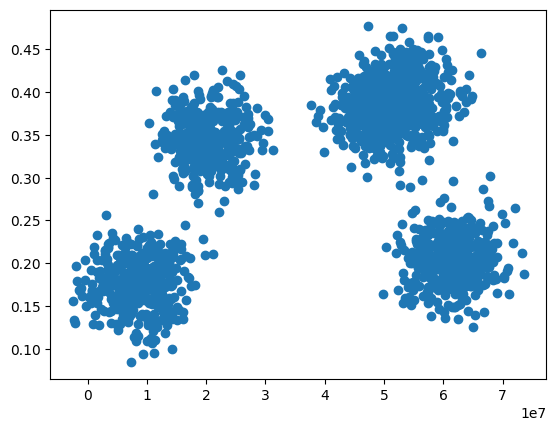

In [5]:
plt.scatter(x=df['x3'], y=df['x4'])
plt.show()

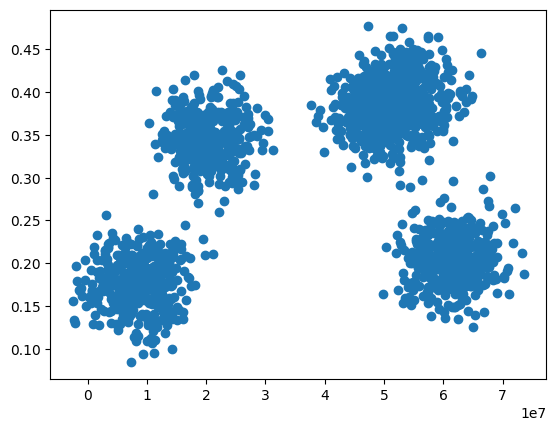

In [6]:
plt.scatter(x=df['x3'], y=df['x4'])
plt.show()

In [7]:
#df = StandardScaler().fit_transform(df)
df = MinMaxScaler().fit_transform(df)

In [8]:
# Compute DBSCAN
db = DBSCAN(eps=0.09, min_samples=5).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


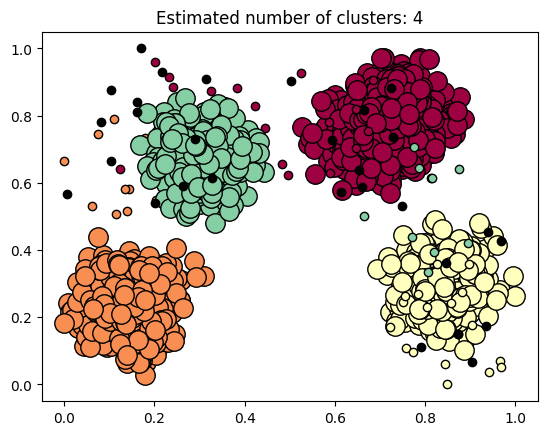

In [9]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
